In [2]:
#!unzip speech-emotion-recognition-ravdess-data.zip
#!unzip images.zip

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
!pwd

/content


In [5]:
import os

In [6]:
root_dir = "/content/gdrive/MyDrive/"
project_folder = "Deep Learning Project/"
os.chdir(root_dir + project_folder)

In [7]:
!pwd

/content/gdrive/MyDrive/Deep Learning Project


In [8]:
%matplotlib inline 
import torch
import torch.nn as nn 
import torch.nn.functional as F 
from torch.utils.data import Dataset, DataLoader 

import os 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import cv2

import librosa
import librosa.display
import skimage.io

import os 
import sys

In [10]:
from utils import * 

**Load in data**

In [11]:
df = pd.read_csv('data/RAVDESS_processed_dataset.csv')
df.head()

,Unnamed: 0,file_name,actor,emotions,emotion_id,statement,image_path
0,0,data/speech-emotion-recognition-ravdess-data/A...,1,neutral,1,1,data/images/03-01-01-01-01-01-01.png
1,1,data/speech-emotion-recognition-ravdess-data/A...,1,calm,2,1,data/images/03-01-02-01-01-01-01.png
2,2,data/speech-emotion-recognition-ravdess-data/A...,1,happy,3,1,data/images/03-01-03-01-01-01-01.png
3,3,data/speech-emotion-recognition-ravdess-data/A...,1,sad,4,1,data/images/03-01-04-01-01-01-01.png
4,4,data/speech-emotion-recognition-ravdess-data/A...,1,angry,5,1,data/images/03-01-05-01-01-01-01.png


**Dataset and Dataloader**

In [12]:
df_train = df[:304]
df_val = df[304:344]
df_test = df[344:]

In [13]:
df_train.iloc[0].image_path

'data/images/03-01-01-01-01-01-01.png'

In [14]:
img_path = df_train.iloc[0].image_path
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

In [17]:
train_dataset = EmotionDataset(df_train)
val_dataset = EmotionDataset(df_val)

In [18]:
x,y = train_dataset.__getitem__(5)

In [19]:
x.size(), y.size()

(torch.Size([1, 128, 128]), torch.Size([8, 128, 128]))

In [20]:
train_dl = DataLoader(train_dataset, batch_size=2)
val_dl = DataLoader(val_dataset, batch_size=2)

**Initial Model** 

In [21]:
gen = UNet()
disc = NLayerDiscriminator(input_nc=9)

**Training Loop**

In [22]:
gen, disc, loss_dict_train, loss_dict_val = train(gen, disc, train_dl, val_dl, num_epochs=50)


epoch = 000
Batch = 0019
epoch = 001
Batch = 0019
epoch = 002
Batch = 0019
epoch = 003
Batch = 0019
epoch = 004
Batch = 0019
epoch = 005
Batch = 0019
epoch = 006
Batch = 0019
epoch = 007
Batch = 0019
epoch = 008
Batch = 0019
epoch = 009
Batch = 0019
epoch = 010
Batch = 0019
epoch = 011
Batch = 0019
epoch = 012
Batch = 0019
epoch = 013
Batch = 0019
epoch = 014
Batch = 0019
epoch = 015
Batch = 0019
epoch = 016
Batch = 0019
epoch = 017
Batch = 0019
epoch = 018
Batch = 0019
epoch = 019
Batch = 0019
epoch = 020
Batch = 0019
epoch = 021
Batch = 0019
epoch = 022
Batch = 0019
epoch = 023
Batch = 0019
epoch = 024
Batch = 0019
epoch = 025
Batch = 0019
epoch = 026
Batch = 0019
epoch = 027
Batch = 0019
epoch = 028
Batch = 0019
epoch = 029
Batch = 0019
epoch = 030
Batch = 0019
epoch = 031
Batch = 0019
epoch = 032
Batch = 0019
epoch = 033
Batch = 0019
epoch = 034
Batch = 0019
epoch = 035
Batch = 0019
epoch = 036
Batch = 0019
epoch = 037
Batch = 0019
epoch = 038
Batch = 0019
epoch = 039
Batch = 0019

**Model Metrics**

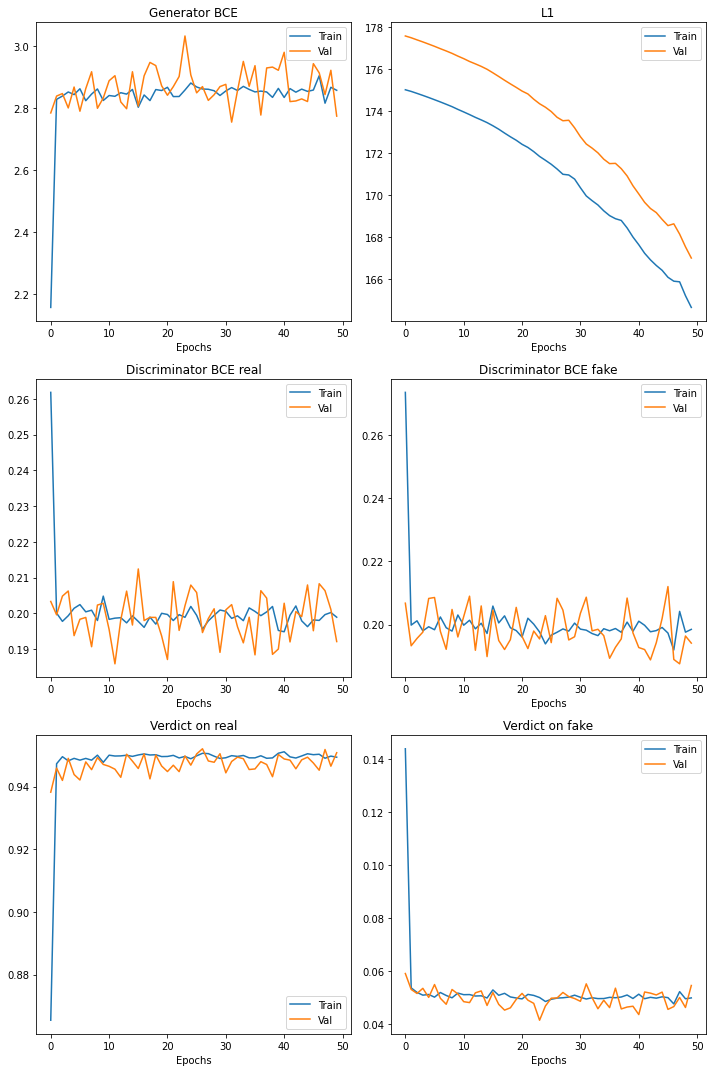

In [23]:
plot_loss(loss_dict_train, loss_dict_val)

**Model Predictions**

In [98]:
test_dataset = EmotionDataset(df_test)

In [99]:
sample_emotion, all_emotions = test_dataset.__getitem__(0)

In [100]:
sample_emotion.size(), all_emotions.size()

(torch.Size([1, 128, 128]), torch.Size([8, 128, 128]))

**Sample Emotion Type**

In [101]:
sample_emotion_label = test_dataset._getname__(0)
print(sample_emotion_label)

1


**Let's see what the generator produces**

In [102]:
sample_emotion, all_emotions = sample_emotion.unsqueeze(0), all_emotions.unsqueeze(0)

In [103]:
all_emotion_predictions = gen(sample_emotion.float().cuda())

In [131]:
all_emotion_predictions = all_emotion_predictions.squeeze()

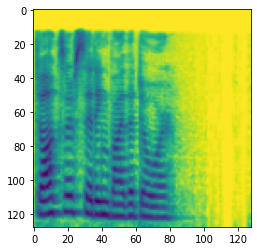

In [143]:
plt.imshow(sample_emotion.squeeze().detach().cpu().numpy())

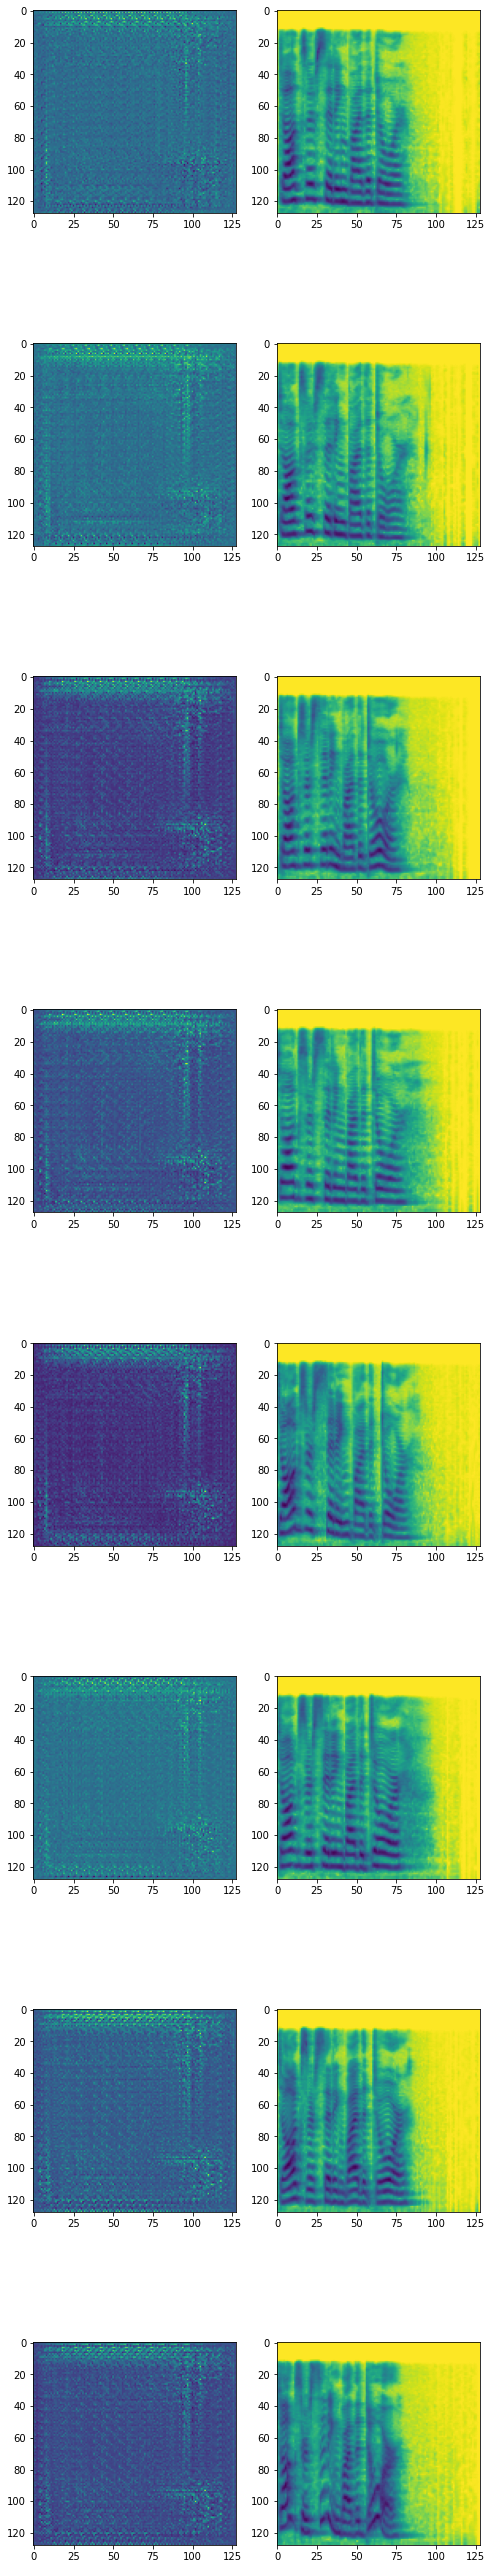

In [145]:
fig, ax = plt.subplots(8,2,figsize=(8,48))
for i in range(8): 
  ax[i][0].imshow(all_emotion_predictions[i].detach().cpu().numpy())
  ax[i][1].imshow(all_emotions.squeeze()[i].detach().cpu().numpy())
plt.show()

**Let's see how good our discriminator works**

In [104]:
emotion_lookup = {'01':'neutral', '02':'calm', '03':'happy', '04':'sad',\
                   '05':'angry', '06':'fear', '07':'disgust','08':'surprise'}

In [105]:
random_idx = np.random.randint(0,8)
print(f"Random Emotion Picked: {emotion_lookup['0'+str(random_idx)]}")

Random Emotion Picked: angry


In [94]:
selected_emotion = torch.select(all_emotions,1,1).unsqueeze(0)
selected_prediction = torch.select(all_emotion_predictions,1,1).unsqueeze(0)

In [106]:
real_pair = torch.cat((sample_emotion.cuda(), all_emotions.cuda()),1).float() 
fake_pair = torch.cat((sample_emotion.cuda(), all_emotion_predictions.cuda()),1).float()

In [128]:
print(f"Real Pair Result: {(torch.softmax(disc(real_pair),0).flatten()>0.9).float().detach().cpu().numpy()}")
print(f"Fake Pair Result: {(torch.softmax(disc(fake_pair),0).flatten()>0.9).float().detach().cpu().numpy()}")

Real Pair Result: [1. 1. 1. 1.]
Fake Pair Result: [1. 1. 1. 1.]


**Converting Model Predictions into Audio Files**

In [146]:
import IPython.display as ipd

**Original Audio**

In [147]:
original = df_test.iloc[0].file_name
ipd.Audio(original) # load a local WAV file